# Analysis of Fake News in dataset fake_news.csv

Data from: https://www.kaggle.com/datasets/emineyetm/fake-news-detection-datasets

Features:
- `subject`: News Subject
- `Date`
- `Title`
- `Text`

Labels:
- `Label`: 1 if fake, 0 if real

Formatted using Black

## Setup & Loading

In [ ]:
%load_ext autoreload
%autoreload 2

In [5]:
from lib import (
    highest_freq_words,
    grid_search_report,
    train_test_split,
    sns,
    grs,
    GridSearchCV,
)
from NLP_algorithms import (
    pd,
    get_textvec_pipeline,
    get_textvect_grid_search_params,
)
from IPython.display import display  # (For linter)
from joblib import parallel_backend

In [3]:
df = pd.read_csv("data/fake_news.csv")
display(df.head())
display(df.describe())

,title,text,subject,date,label
0,WOW! LOU DOBBS BLASTS #FakePresident OBAMA: “S...,Lou Dobbs went off on #FakePresident Barack Ob...,politics,2017-07-11,0
1,President WATCH: FUNNIEST Done ‘Couch Commande...,For his final White House Correspondent s Dinn...,News,2016-04-30,0
2,RELIGION OF PROGRESSIVISM: Meet Obama’s NEW Tr...,The religion of Progressivism is working overt...,politics,2016-05-17,0
3,Breitbart Caught Praising Melania For Exact T...,In a stunning example of just how morally bank...,News,2017-05-21,0
4,HOST SICKENING! MOCKS Jeff Grandchildren Senat...,,politics,2017-01-10,0


,label
count,2500.00000
mean,0.47720
std,0.49958
min,0.00000
25%,0.00000
50%,0.00000
75%,1.00000
max,1.00000


## Data Selection & Holdout

In [ ]:
X = df[["text", "subject"]]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=grs
)

# Exploratory Data Analysis

<Axes: xlabel='label', ylabel='count'>

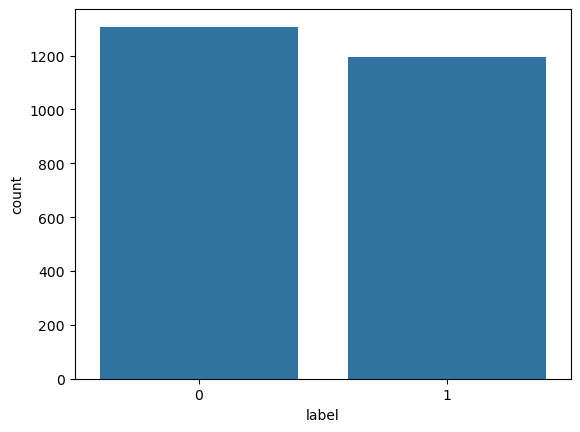

In [21]:
sns.countplot(data=df, x="label")

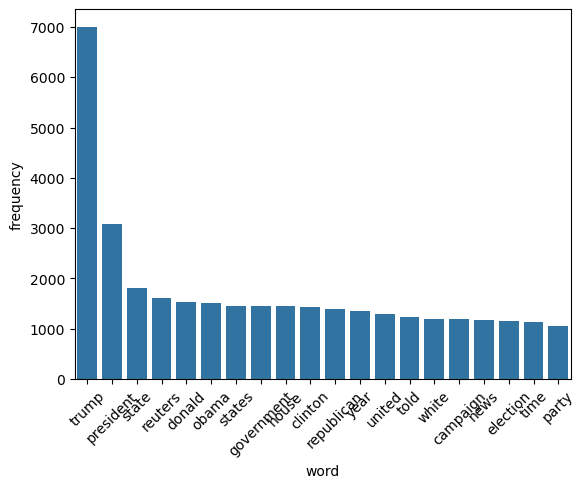

In [24]:
highest_freq_words(df, 20, "text")

# Model 1: Simple Bag of Words Sentiment Analysis

In [ ]:
estimator_sbw = get_textvec_pipeline(tf_idf=False, pca=False)
grid_search_sbw = GridSearchCV(
    estimator_sbw,
    get_textvect_grid_search_params(tf_idf=False, pca=False),
    scoring="f1",
    cv=5,
    n_jobs=-1,
)

In [ ]:
with parallel_backend("threading"):
    grid_search_sbw.fit(X_train, y_train)

[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (2000, 1)


In [6]:
grid_search_report(
    "Bag of words sentiment anlysis, linear regression",
    "F1",
    grid_search_sbw,
    X_test,
    y_test,
)

NameError: name 'grid_search_sbw' is not defined

# Model 2: TF-IDF Sentiment Analysis

In [ ]:
estimator_tfidf = get_textvec_pipeline(tf_idf=True, pca=False)
grid_search_tfidf = GridSearchCV(
    estimator_tfidf,
    get_textvect_grid_search_params(tf_idf=True, pca=False),
    scoring="f1",
    cv=5,
    n_jobs=-1,
)

In [ ]:
with parallel_backend("threading"):
    grid_search_tfidf.fit(X_train, y_train)

[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)

[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (1600, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (400, 1)


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (2000, 1)


In [ ]:
grid_search_report(
    "TF-IDF sentiment anlysis, linear regression",
    "F1",
    grid_search_tfidf,
    X_test,
    y_test,
)

Report for:  TF-IDF sentiment anlysis, linear regression
[DEBUG] type(X): <class 'pandas.core.frame.DataFrame'>, shape: (500, 1)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       252
           1       1.00      1.00      1.00       248

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

Confusion Matrix:
[[252   0]
 [  1 247]]
Best Parameters: {'process__tfidf__tfidf__max_df': 0.9, 'process__tfidf__tfidf__min_df': 0.05, 'process__tfidf__tfidf__ngram_range': (1, 1)}
F1 Score of Best Model: 99.68 %


/opt/anaconda3/envs/CSB320/lib/python3.9/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
